In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/microsoft/OmniParser.git
%cd OmniParser

Cloning into 'OmniParser'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 328 (delta 103), reused 126 (delta 76), pack-reused 162 (from 1)
Receiving objects: 100% (328/328), 34.74 MiB | 12.78 MiB/s, done.
Resolving deltas: 100% (138/138), done.
/content/OmniParser


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 9.4 MB/s eta 0:00:00


In [4]:
#This step copies the hugging face weights folder once to a shared path and use it in this Colab
!cp -r /content/drive/Shareddrives/AIResearch/OmniParserWeights/* /content/OmniParser/weights/

In [ ]:
#One time activity when v 1.5 was released after the step for copying the weights folder
#!mv /content/OmniParserv1/* /content/OmniParser/weights/
#!cp -r /content/OmniParser/* /content/drive/Shareddrives/AIResearch/OmniParserWeights/


In [ ]:
# The following step for executing to copy weights folder from the following git repository
#This step eliminates the need to copy from the drive in the cp command in the above steps
# Make sure you have git-lfs installed (https://git-lfs.com)
##
#!git lfs install
##
#Uncomment the above if you need to manually perform the copying of the weights on each execution


In [ ]:
##Refer above steps .This is step 2.
#!git clone https://huggingface.co/microsoft/OmniParser

In [5]:
!python weights/convert_safetensor_to_pt.py --version v1_5


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [9]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'

#Using the new Version 1_5 of OmniParser--
som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')

# Added for demo.ipynb updates on git for 05-Nov-2024 Changes
#som_model = get_yolo_model(model_path='weights/icon_detect_v1_5/model_v1_5.pt')
som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [ ]:
!pip install flash_attn

In [10]:
# two choices for caption model: fine-tuned blip2 or florence2

#caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, ot

In [11]:
som_model.device, type(som_model)

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [12]:
#New steps in version 1_5 as compared to version 1 of OmniParser
cnt = 0
image_path = 'imgs/autogen.png'
# image_path = 'imgs/windows_home.png'
#image_path = 'imgs/windows_multitab.png'

BOX_TRESHOLD = 0.03

image = Image.open(image_path)
image_rgb = image.convert('RGB')
box_overlay_ratio = image.size[0] / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.5}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time()

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time()


image 1/1 /content/OmniParser/imgs/autogen.png: 384x640 31 0s, 97.2ms
Speed: 4.0ms preprocess, 97.2ms inference, 837.0ms postprocess per image at shape (1, 3, 384, 640)


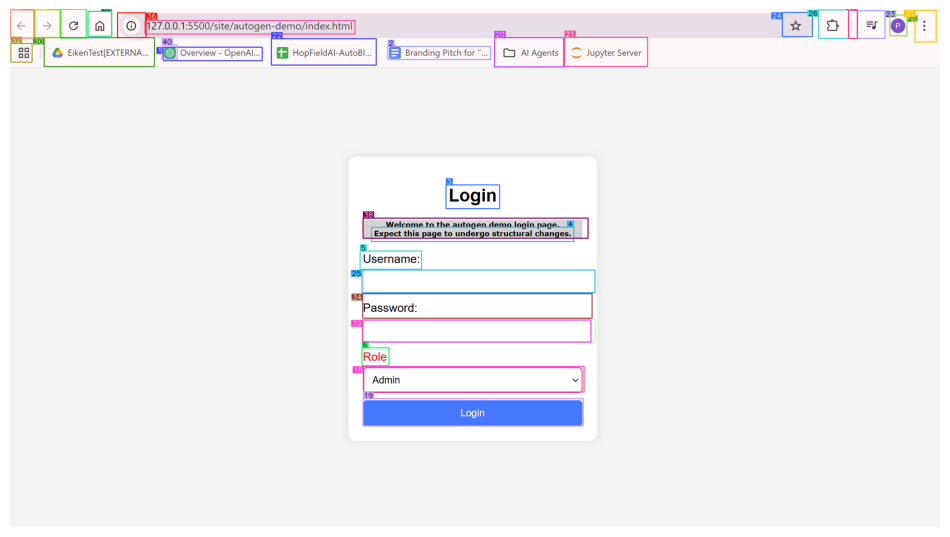

In [18]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)


In [19]:
import io
import base64
decoded_image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
decoded_image.save("Pravash_Panda_001.png")

In [14]:
parsed_content_list


[{'type': 'text',
  'bbox': [0.14493322372436523,
   0.02186177670955658,
   0.3707776963710785,
   0.04795486479997635],
  'interactivity': False,
  'content': '127.0.0.1:5500/site/autogen-demo/index.html'},
 {'type': 'text',
  'bbox': [0.1645718812942505,
   0.07334273308515549,
   0.2710133492946625,
   0.09943582862615585],
  'interactivity': False,
  'content': ' Overview - OpenAl....'},
 {'type': 'text',
  'bbox': [0.4061272442340851,
   0.07193230092525482,
   0.516496479511261,
   0.09732016921043396],
  'interactivity': False,
  'content': ' Branding Pitch for "...'},
 {'type': 'text',
  'bbox': [0.46857815980911255,
   0.3392101526260376,
   0.5263158082962036,
   0.38504937291145325],
  'interactivity': False,
  'content': 'Login'},
 {'type': 'text',
  'bbox': [0.3884524703025818,
   0.42101550102233887,
   0.6060487031936646,
   0.4485190510749817],
  'interactivity': False,
  'content': 'Expect this page to undergo structural changes.'},
 {'type': 'text',
  'bbox': [0.3762

In [15]:
label_coordinates

{'0': [0.1449332525668328,
  0.021861777150916785,
  0.2258444619010212,
  0.02609308885754584],
 '1': [0.1645718774548311,
  0.07334273624823695,
  0.10644147682639435,
  0.02609308885754584],
 '2': [0.406127258444619,
  0.07193229901269393,
  0.11036920659858601,
  0.02538787023977433],
 '3': [0.4685781618224666,
  0.3392101551480959,
  0.05773762765121759,
  0.045839210155148094],
 '4': [0.3884524744697565,
  0.421015514809591,
  0.2175962293794187,
  0.027503526093088856],
 '5': [0.3762765121759623,
  0.46685472496473907,
  0.06598586017282011,
  0.03526093088857546],
 '6': [0.37824037706205815,
  0.653737658674189,
  0.029065200314218383,
  0.03455571227080395],
 '7': [0.3802774553681019,
  0.6900667908833965,
  0.23705373855434997,
  0.04931929013961125],
 '8': [0.3795305538252406,
  0.7518695352444024,
  0.2370572865524352,
  0.05306546274462271],
 '9': [0.5208788659754271,
  0.055407719148062855,
  0.07454190550127651,
  0.056431048007206455],
 '10': [0.5964336769841172,
  0.05

In [16]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,ID
0,text,"[0.14493322372436523, 0.02186177670955658, 0.3...",False,127.0.0.1:5500/site/autogen-demo/index.html,0
1,text,"[0.1645718812942505, 0.07334273308515549, 0.27...",False,Overview - OpenAl....,1
2,text,"[0.4061272442340851, 0.07193230092525482, 0.51...",False,"Branding Pitch for ""...",2
3,text,"[0.46857815980911255, 0.3392101526260376, 0.52...",False,Login,3
4,text,"[0.3884524703025818, 0.42101550102233887, 0.60...",False,Expect this page to undergo structural changes.,4
5,text,"[0.37627652287483215, 0.4668547213077545, 0.44...",False,Username:,5
6,text,"[0.3782403767108917, 0.6537376642227173, 0.407...",False,Role,6
7,text,"[0.38027745485305786, 0.6900667548179626, 0.61...",True,Admin,7
8,text,"[0.37953057885169983, 0.7518695592880249, 0.61...",True,Login,8
9,text,"[0.5208789110183716, 0.05540771782398224, 0.59...",True,AI Agents,9


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
## Additional formatting for the extracted data in version 1
#!pip install jason
#!pip install simplejson
#!pip install django

In [ ]:
import json
file_path = "/content/parsed_content_list.json"
with open(file_path, 'w') as json_file:
    json.dump(parsed_content_list, json_file)

print(f"Parsed content list saved to {file_path}")

In [ ]:
%cat /content/parsed_content_list.json